In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

c:\Users\91735\Anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_exploded=df.explode('job_skills')
df_exploded=df_exploded[df['job_title_short']=='Data Analyst']

C:\Users\91735\AppData\Local\Temp\ipykernel_29224\1242414025.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_exploded=df_exploded[df['job_title_short']=='Data Analyst']


In [11]:
temp=df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg','median'),
    skill_count=('job_skills','count')
)
temp=temp.sort_values(by='skill_count', ascending=False).head(20)
temp

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


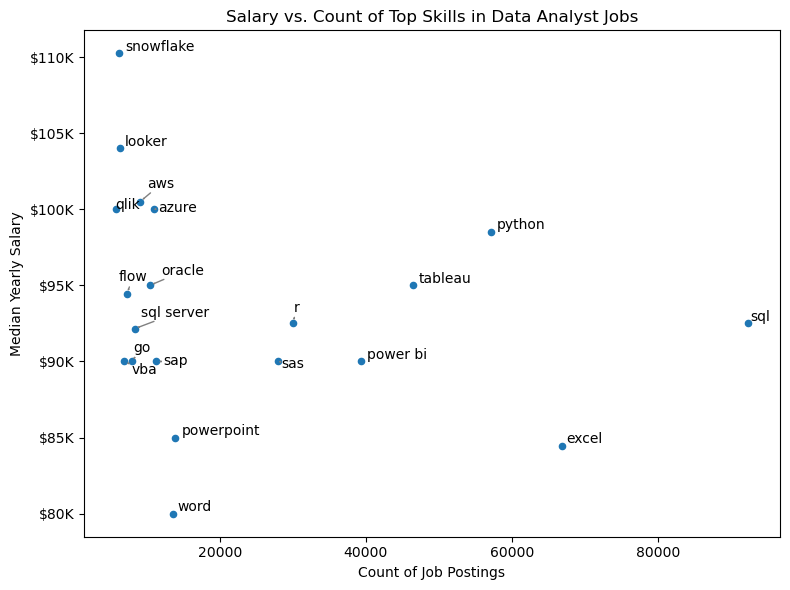

In [15]:
from adjustText import adjust_text

temp.plot(kind='scatter',x='skill_count',y='median_salary',figsize=(8,6))
texts=[]
for i, txt in enumerate(temp.index):
   texts.append(plt.text(temp['skill_count'].iloc[i],temp['median_salary'].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}K'))
plt.tight_layout()
plt.show()